<a href="https://colab.research.google.com/github/UttaraKet1607/Hindi-Character-Recognition/blob/main/Baseline_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download zip files from here : https://drive.google.com/drive/folders/1O8TT0s4zMyiI6zR-biVRoiLiAUy-W1H0

In [ ]:
! unzip "test.zip"

Archive:  test.zip
   creating: test/
  inflating: test/1.jpg              
  inflating: test/10.jpg             
  inflating: test/11.jpg             
  inflating: test/12.jpg             
  inflating: test/13.jpg             
  inflating: test/14.jpg             
  inflating: test/15.jpg             
  inflating: test/16.jpg             
  inflating: test/17.jpg             
  inflating: test/18.jpg             
  inflating: test/19.jpg             
  inflating: test/2.jpg              
  inflating: test/20.jpg             
  inflating: test/21.jpg             
  inflating: test/22.jpg             
  inflating: test/23.jpg             
  inflating: test/24.jpg             
  inflating: test/25.jpg             
  inflating: test/26.jpg             
  inflating: test/27.jpg             
  inflating: test/28.jpg             
  inflating: test/29.jpg             
  inflating: test/3.jpg              
  inflating: test/30.jpg             
  inflating: test/31.jpg             
  inflating:

In [ ]:
! unzip "training.zip"

Streaming output truncated to the last 5000 lines.
  inflating: training/background/door_34_none_none_d3.jpg  
  inflating: training/background/door_34_none_sharpen.jpg  
  inflating: training/background/door_34_none_sharpen_d2.jpg  
  inflating: training/background/door_34_none_sharpen_d3.jpg  
  inflating: training/background/door_34_rotate_edgeEnhance.jpg  
  inflating: training/background/door_34_rotate_edgeEnhance_d2.jpg  
  inflating: training/background/door_34_rotate_edgeEnhance_d3.jpg  
  inflating: training/background/door_34_rotate_none.jpg  
  inflating: training/background/door_34_rotate_none_d2.jpg  
  inflating: training/background/door_34_rotate_none_d3.jpg  
  inflating: training/background/door_34_rotate_sharpen.jpg  
  inflating: training/background/door_34_rotate_sharpen_d2.jpg  
  inflating: training/background/door_34_rotate_sharpen_d3.jpg  
  inflating: training/background/door_34_rotate_smooth.jpg  
  inflating: training/background/door_34_rotate_smooth_d2.jpg  

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
imgs_path = "./training"
data_list = []
labels_list = []
classes_list = ["background","hi"]
for i in classes_list:
    i_path = os.path.join(imgs_path, i) 
    if i == "background":
      for img in os.listdir(i_path):
          im = Image.open(i_path +'/'+ img)
          im = im.resize((50,50))
          im = np.array(im)
          data_list.append(im)
          labels_list.append(0)
    if i == "hi":
      for img in os.listdir(i_path):
          im = Image.open(i_path +'/'+ img)
          im = im.resize((50,50))
          im = np.array(im)
          data_list.append(im)
          labels_list.append(1)
    

In [ ]:
x = np.random.randint(5875)
print(x , labels_list[x])

3526 0


In [ ]:
data = np.array(data_list)
labels = np.array(labels_list)
print("Done")
print(data.shape)

Done
(5875, 50, 50, 3)


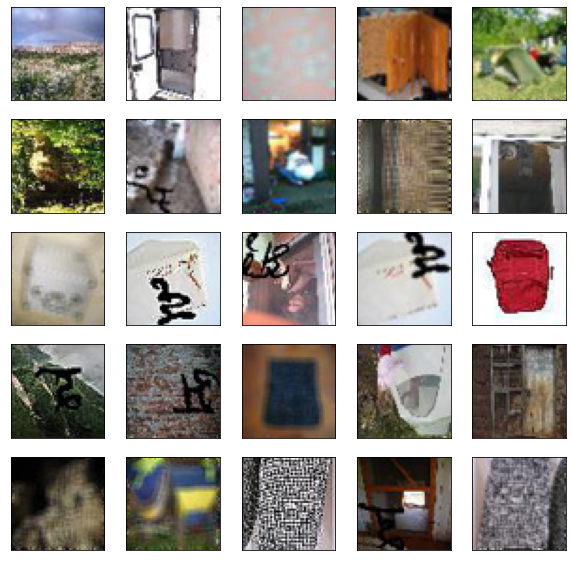

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[np.random.randint(5875)], cmap=plt.cm.binary)
    
plt.show()

In [ ]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

(5875, 50, 50, 3) (5875,)
(4700, 50, 50, 3) (1175, 50, 50, 3) (4700,) (1175,)
